In [404]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import os
import geopandas as gpd

In [49]:
mci = pd.read_csv('MCI_2014_to_2018.csv')
demo = pd.read_csv('neighbourhood_demographics.csv')
income = pd.read_csv('neighbourhood_income.csv')
family = pd.read_csv('neighbourhood_density_and_families.csv')

In [4]:
mci.head()

,X,Y,Index_,event_unique_id,occurrencedate,reporteddate,premisetype,ucr_code,ucr_ext,offence,...,occurrencedayofyear,occurrencedayofweek,occurrencehour,MCI,Division,Hood_ID,Neighbourhood,Lat,Long,ObjectId
0,-79.385193,43.659229,2349,GO-20149004286,2014-06-20T10:55:00.000Z,2014-06-20T13:20:00.000Z,Apartment,2130,210,Theft Over,...,171.0,Friday,10,Theft Over,D52,76,Bay Street Corridor (76),43.659229,-79.385193,2001
1,-79.425400,43.777592,2350,GO-20142411379,2014-07-02T00:20:00.000Z,2014-07-02T02:58:00.000Z,Outside,1457,100,Pointing A Firearm,...,183.0,Wednesday,0,Assault,D32,36,Newtonbrook West (36),43.777592,-79.425400,2002
2,-79.425400,43.777592,2351,GO-20142411379,2014-07-02T00:20:00.000Z,2014-07-02T02:58:00.000Z,Outside,1610,100,Robbery With Weapon,...,183.0,Wednesday,0,Robbery,D32,36,Newtonbrook West (36),43.777592,-79.425400,2003
3,-79.210373,43.801727,2352,GO-20142412127,2014-07-02T01:30:00.000Z,2014-07-02T05:40:00.000Z,House,2120,200,B&E,...,183.0,Wednesday,1,Break and Enter,D42,132,Malvern (132),43.801727,-79.210373,2004
4,-79.254334,43.835884,2354,GO-20142417548,2014-07-02T20:52:00.000Z,2014-07-02T20:57:00.000Z,Commercial,1430,100,Assault,...,183.0,Wednesday,20,Assault,D42,130,Milliken (130),43.835884,-79.254334,2005


In [63]:
mci.drop(["Index_","X", "Y", "event_unique_id", "ucr_code", "ucr_ext", "ObjectId"], axis = 1, inplace = True)  

In [64]:
mci.columns

Index(['occurrencedate', 'reporteddate', 'premisetype', 'offence',
       'reportedyear', 'reportedmonth', 'reportedday', 'reporteddayofyear',
       'reporteddayofweek', 'reportedhour', 'occurrenceyear',
       'occurrencemonth', 'occurrenceday', 'occurrencedayofyear',
       'occurrencedayofweek', 'occurrencehour', 'MCI', 'Division', 'Hood_ID',
       'Neighbourhood', 'Lat', 'Long'],
      dtype='object')

In [65]:
full_list = mci.offence.unique()
full_list

array(['Theft Over', 'Pointing A Firearm', 'Robbery With Weapon', 'B&E',
       'Assault', "B&E W'Intent", 'Assault With Weapon',
       'Assault Bodily Harm', 'Robbery - Other',
       'Unlawfully In Dwelling-House', 'Robbery - Mugging',
       'Administering Noxious Thing', 'Theft From Mail / Bag / Key',
       'Assault Peace Officer', 'Theft From Motor Vehicle Over',
       'Robbery - Business', 'Robbery - Swarming',
       'Assault - Resist/ Prevent Seiz', 'Robbery - Purse Snatch',
       'Robbery - Financial Institute', 'Aggravated Assault',
       'Disarming Peace/Public Officer', 'Robbery - Taxi',
       'Theft - Misapprop Funds Over', 'Use Firearm / Immit Commit Off',
       'Theft Over - Shoplifting', 'Robbery - Home Invasion', 'B&E Out',
       'Robbery - Vehicle Jacking', 'Robbery - Atm',
       'Robbery - Delivery Person', 'Crim Negligence Bodily Harm',
       'Theft Over - Bicycle', 'Unlawfully Causing Bodily Harm',
       'Aggravated Aslt Peace Officer', 'Theft Over - Dis

In [77]:
mci_list = mci.MCI.unique()
mci = mci.drop_duplicates() #drop duplicates
mci = mci.dropna() #drop rows with missing values

In [78]:
print('Duplicates:',mci.duplicated().any())

Duplicates: False


In [79]:
print('Missing Data')
mci.isnull().sum().sort_values(ascending=False)

Missing Data


Long                   0
Lat                    0
reporteddate           0
premisetype            0
offence                0
reportedyear           0
reportedmonth          0
reportedday            0
reporteddayofyear      0
reporteddayofweek      0
reportedhour           0
occurrenceyear         0
occurrencemonth        0
occurrenceday          0
occurrencedayofyear    0
occurrencedayofweek    0
occurrencehour         0
MCI                    0
Division               0
Hood_ID                0
Neighbourhood          0
occurrencedate         0
dtype: int64

In [80]:
theft = mci.loc[mci['MCI'] == 'Theft Over']
assault = mci.loc[mci['MCI'] == 'Assault']
robbery = mci.loc[mci['MCI'] == 'Robbery']
bne = mci.loc[mci['MCI'] == 'Break and Enter']
auto = mci.loc[mci['MCI'] == 'Auto Theft']

In [81]:
mci_ct = mci.MCI.count()
theft_ct = theft.MCI.count()
assault_ct = assault.MCI.count()
robbery_ct = robbery.MCI.count()
bne_ct = bne.MCI.count()
auto_ct = auto.MCI.count()
crime_ct = [theft_ct, assault_ct, robbery_ct, bne_ct, auto_ct]

In [82]:
count_data = {'crime_type': mci_list, 'crime_count': crime_ct}
count_db = pd.DataFrame(data=count_data, dtype=np.int64)
count_db['crime_pct'] = count_db['crime_count']/count_db['crime_count'].sum()

In [83]:
count_db.head()

,crime_type,crime_count,crime_pct
0,Theft Over,5423,0.034919
1,Assault,82839,0.533402
2,Robbery,15401,0.099167
3,Break and Enter,34765,0.223853
4,Auto Theft,16875,0.108659


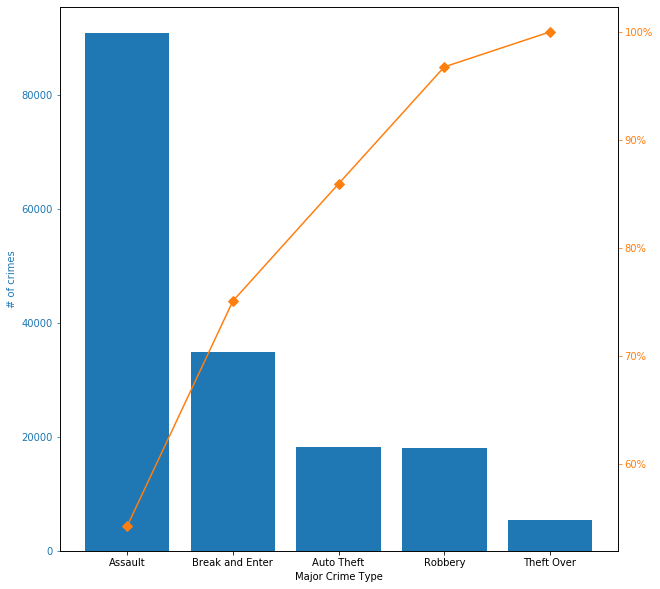

In [36]:
from matplotlib.ticker import PercentFormatter
count_db = count_db.sort_values(by='crime_count', ascending=False)
count_db['cumpct'] = count_db['crime_count'].cumsum()/count_db['crime_count'].sum()*100

fig, ax = plt.subplots(figsize=(10,10))
ax.bar(count_db["crime_type"], count_db["crime_count"], color="C0")
ax2 = ax.twinx()
ax2.plot(count_db["crime_type"], count_db["cumpct"], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.set_xlabel('Major Crime Type')
ax.yaxis.label.set_color('C0')
ax.set_ylabel("# of crimes")

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")

plt.show()

In [38]:
mci_by_yr = pd.DataFrame({'year': [2014, 2014, 2014, 2014, 2014, 2015, 2015, 2015, 2015, 2015, 2016, 2016, 2016, 2016, 2016, 2017, 2017, 2017, 2017, 2017, 2018, 2018, 2018, 2018, 2018], 'mci': ['Theft Over', 'Assault', 'Robbery', 'Break and Enter', 'Auto Theft', 'Theft Over', 'Assault', 'Robbery', 'Break and Enter', 'Auto Theft', 'Theft Over', 'Assault', 'Robbery', 'Break and Enter', 'Auto Theft', 'Theft Over', 'Assault', 'Robbery', 'Break and Enter', 'Auto Theft','Theft Over', 'Assault', 'Robbery', 'Break and Enter', 'Auto Theft'], 'mci_count': mci.groupby(['reportedyear', 'MCI']).size()})
mci_by_yr.dtypes

year          int64
mci          object
mci_count     int64
dtype: object

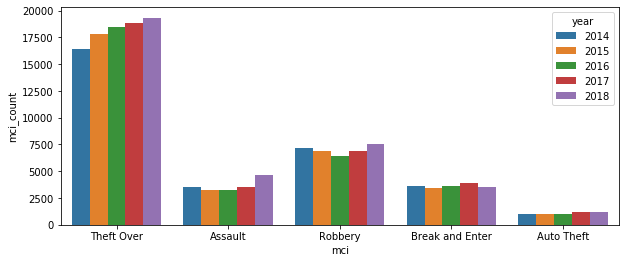

In [84]:
fig_dims = (10, 4)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.barplot(x="mci", y="mci_count", hue="year", ax=ax, data=mci_by_yr)
ax

In [113]:
#Savingplotting codes for later
#toronto = gpd.read_file('TorontoNeighbourhoods.shx')
#toronto.plot()
#geoplot.polyplot(toronto, figsize=(20,20))

In [114]:
mci.head()

,occurrencedate,reporteddate,premisetype,offence,reportedyear,reportedmonth,reportedday,reporteddayofyear,reporteddayofweek,reportedhour,...,occurrenceday,occurrencedayofyear,occurrencedayofweek,occurrencehour,MCI,Division,Hood_ID,Neighbourhood,Lat,Long
0,2014-06-20T10:55:00.000Z,2014-06-20T13:20:00.000Z,Apartment,Theft Over,2014,June,20,171,Friday,13,...,20.0,171.0,Friday,10,Theft Over,D52,76,Bay Street Corridor (76),43.659229,-79.385193
1,2014-07-02T00:20:00.000Z,2014-07-02T02:58:00.000Z,Outside,Pointing A Firearm,2014,July,2,183,Wednesday,2,...,2.0,183.0,Wednesday,0,Assault,D32,36,Newtonbrook West (36),43.777592,-79.425400
2,2014-07-02T00:20:00.000Z,2014-07-02T02:58:00.000Z,Outside,Robbery With Weapon,2014,July,2,183,Wednesday,2,...,2.0,183.0,Wednesday,0,Robbery,D32,36,Newtonbrook West (36),43.777592,-79.425400
3,2014-07-02T01:30:00.000Z,2014-07-02T05:40:00.000Z,House,B&E,2014,July,2,183,Wednesday,5,...,2.0,183.0,Wednesday,1,Break and Enter,D42,132,Malvern (132),43.801727,-79.210373
4,2014-07-02T20:52:00.000Z,2014-07-02T20:57:00.000Z,Commercial,Assault,2014,July,2,183,Wednesday,20,...,2.0,183.0,Wednesday,20,Assault,D42,130,Milliken (130),43.835884,-79.254334


In [115]:
demo.rename(columns={'Total - Citizenship for the population in private households - 25% sample data': 'TotalPop'})
demo = demo.reset_index()
demo

,level_0,index,Neighbourhood Number,Characteristic,Total - Citizenship for the population in private households - 25% sample data,Canadian citizens,Canadian citizens aged under 18,Canadian citizens aged 18 and over,Not Canadian citizens,Non-immigrants,...,Visible minority; n.i.e.,Multiple visible minorities,Not a visible minority,Total - Population aged 15 years and over by Labour force status - 25% sample data,In the labour force,Employed,Unemployed,Participation rate,Employment rate,Unemployment rate
0,0,2,128,Agincourt South-Malvern West,"23,465","19,015","3,405","15,605","4,465","7,190",...,275,490,"3,320","20,400","12,045","10,855","1,185",59.0,53.2,9.8
1,1,3,20,Alderwood,"12,030","11,425","2,085","9,340",600,"7,975",...,140,180,"9,535","10,265","6,825","6,405",415,66.5,62.4,6.1
2,2,4,95,Annex,"28,645","25,550","2,615","22,930","3,085","19,030",...,125,480,"21,380","26,295","18,560","17,305","1,250",70.6,65.8,6.7
3,3,5,42,Banbury-Don Mills,"27,000","24,105","4,130","19,975","2,900","13,310",...,155,470,"14,290","23,395","14,015","13,010","1,010",59.9,55.6,7.2
4,4,6,34,Bathurst Manor,"15,580","13,175","2,420","10,755","2,410","7,135",...,95,135,"10,165","13,265","8,620","8,000",620,65.0,60.3,7.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,134,136,94,Wychwood,"13,250","12,135","2,095","10,050","1,115","8,525",...,70,260,"9,605","11,385","7,875","7,470",410,69.2,65.6,5.2
135,135,137,100,Yonge-Eglinton,"11,805","10,425","1,965","8,460","1,380","8,080",...,50,140,"8,650","9,995","7,320","6,815",505,73.2,68.2,6.9
136,136,138,97,Yonge-St.Clair,"12,300","10,925","1,215","9,725","1,360","8,325",...,65,120,"9,740","11,105","7,710","7,245",455,69.4,65.2,5.9
137,137,139,27,York University Heights,"27,565","21,520","4,305","17,220","6,050","10,295",...,535,620,"8,430","23,520","14,815","13,235","1,585",63.0,56.3,10.7


In [116]:
by_hood = pd.crosstab(mci.Hood_ID, mci.MCI, margins=True)
by_hood

MCI,Assault,Auto Theft,Break and Enter,Robbery,Theft Over,All
Hood_ID,,,,,,
1,1265,1534,642,322,244,4007
2,1200,277,168,380,18,2043
3,267,102,103,90,12,574
4,319,124,89,83,9,624
5,298,88,63,82,6,537
...,...,...,...,...,...,...
137,1734,196,533,371,76,2910
138,974,118,312,226,27,1657
139,745,80,206,105,16,1152


In [117]:
demo['Neighbourhood Number'] = demo['Neighbourhood Number'].astype('int64')
demo.dtypes

level_0                                                                                 int64
index                                                                                   int64
Neighbourhood Number                                                                    int64
Characteristic                                                                         object
Total - Citizenship for the population in private households - 25% sample data         object
Canadian citizens                                                                      object
Canadian citizens aged under 18                                                        object
Canadian citizens aged 18 and over                                                     object
Not Canadian citizens                                                                  object
Non-immigrants                                                                         object
Immigrants                                                  

In [169]:
hood_merge = by_hood.merge(demo, left_on='Hood_ID', right_on='Neighbourhood Number')
hood_merge = hood_merge.set_index('Neighbourhood Number')
hood_merge

,Assault,Auto Theft,Break and Enter,Robbery,Theft Over,All,level_0,index,Characteristic,Total - Citizenship for the population in private households - 25% sample data,...,Visible minority; n.i.e.,Multiple visible minorities,Not a visible minority,Total - Population aged 15 years and over by Labour force status - 25% sample data,In the labour force,Employed,Unemployed,Participation rate,Employment rate,Unemployment rate
Neighbourhood Number,,,,,,,,,,,,,,,,,,,,,
1,1265,1534,642,322,244,4007,123,125,West Humber-Clairville,"32,885",...,"1,535",685,"5,940","27,850","17,845","16,140","1,705",64.1,58.0,9.6
2,1200,277,168,380,18,2043,80,82,Mount Olive-Silverstone-Jamestown,"32,830",...,"1,445",610,"4,375","25,735","14,765","12,975","1,785",57.4,50.4,12.1
3,267,102,103,90,12,574,116,118,Thistletown-Beaumond Heights,"10,125",...,285,160,"3,615","8,395","5,060","4,540",525,60.3,54.1,10.4
4,319,124,89,83,9,624,100,102,Rexdale-Kipling,"10,355",...,235,170,"4,990","8,725","5,480","4,880",600,62.8,55.9,10.9
5,298,88,63,82,6,537,37,39,Elms-Old Rexdale,"9,445",...,210,245,"3,085","7,640","4,635","4,175",465,60.7,54.6,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,1788,103,416,280,35,2622,122,124,West Hill,"26,960",...,925,695,"9,885","22,395","13,100","11,585","1,515",58.5,51.7,11.6
137,1734,196,533,371,76,2910,131,133,Woburn,"53,005",...,"1,000","1,025","12,495","43,400","25,180","22,505","2,665",58.0,51.9,10.6
138,974,118,312,226,27,1657,36,38,Eglinton East,"22,250",...,950,455,"4,880","18,065","10,690","9,540","1,155",59.2,52.8,10.8


In [180]:
hood_merge = hood_merge.drop(columns=['level_0', 'index'])
hood_merge

,Assault,Auto Theft,Break and Enter,Robbery,Theft Over,All,Characteristic,Total - Citizenship for the population in private households - 25% sample data,Employment rate,Unemployment rate
Neighbourhood Number,,,,,,,,,,
1,1265,1534,642,322,244,4007,West Humber-Clairville,"32,885",58.0,9.6
2,1200,277,168,380,18,2043,Mount Olive-Silverstone-Jamestown,"32,830",50.4,12.1
3,267,102,103,90,12,574,Thistletown-Beaumond Heights,"10,125",54.1,10.4
4,319,124,89,83,9,624,Rexdale-Kipling,"10,355",55.9,10.9
5,298,88,63,82,6,537,Elms-Old Rexdale,"9,445",54.6,10.0
...,...,...,...,...,...,...,...,...,...,...
136,1788,103,416,280,35,2622,West Hill,"26,960",51.7,11.6
137,1734,196,533,371,76,2910,Woburn,"53,005",51.9,10.6
138,974,118,312,226,27,1657,Eglinton East,"22,250",52.8,10.8


In [210]:
#hood_merge = hood_merge.rename(columns={'Total - Citizenship for the population in private households - 25% sample data': 'TotalPop'})
hood_merge2

,Assault,Auto Theft,Break and Enter,Robbery,Theft Over,All,Characteristic,TotalPop,Employment rate,Unemployment rate
Neighbourhood Number,,,,,,,,,,
1,1265,1534,642,322,244,4007,West Humber-Clairville,"32,885",58.0,9.6
2,1200,277,168,380,18,2043,Mount Olive-Silverstone-Jamestown,"32,830",50.4,12.1
3,267,102,103,90,12,574,Thistletown-Beaumond Heights,"10,125",54.1,10.4
4,319,124,89,83,9,624,Rexdale-Kipling,"10,355",55.9,10.9
5,298,88,63,82,6,537,Elms-Old Rexdale,"9,445",54.6,10.0
...,...,...,...,...,...,...,...,...,...,...
136,1788,103,416,280,35,2622,West Hill,"26,960",51.7,11.6
137,1734,196,533,371,76,2910,Woburn,"53,005",51.9,10.6
138,974,118,312,226,27,1657,Eglinton East,"22,250",52.8,10.8


In [185]:
hood_merge2.columns

Index(['Assault', 'Auto Theft', 'Break and Enter', 'Robbery', 'Theft Over',
       'All', 'Characteristic', 'TotalPop', 'Employment rate',
       'Unemployment rate'],
      dtype='object')

In [ ]:
hood_merge = hood_merge.drop(columns=['Canadian citizens', 'Canadian citizens aged under 18',
       'Canadian citizens aged 18 and over', 'Not Canadian citizens',
      'Non-immigrants', 'Immigrants', 'Total visible minority population',
       'South Asian', 'Chinese', 'Black', 'Filipino', 'Arab',
       'Southeast Asian', ' West Asian', 'Korean', 'Japanese',
       'Visible minority; n.i.e.', 'Multiple visible minorities',
       'Not a visible minority',
       'Total - Population aged 15 years and over by Labour force status - 25% sample data',
       'In the labour force', 'Employed', 'Unemployed', 'Participation rate'])

In [205]:
hood_bounds = pd.read_csv('Neighbourhoods.csv')
hood_bounds.head()

,_id,AREA_ID,AREA_ATTR_ID,PARENT_AREA_ID,AREA_SHORT_CODE,AREA_LONG_CODE,AREA_NAME,AREA_DESC,X,Y,LONGITUDE,LATITUDE,OBJECTID,Shape__Area,Shape__Length,geometry
0,3641,25886861,25926662,49885,94,94,Wychwood (94),Wychwood (94),NaN,NaN,-79.425515,43.676919,16491505,3.217960e+06,7515.779658,"{u'type': u'Polygon', u'coordinates': (((-79.4..."
1,3642,25886820,25926663,49885,100,100,Yonge-Eglinton (100),Yonge-Eglinton (100),NaN,NaN,-79.403590,43.704689,16491521,3.160334e+06,7872.021074,"{u'type': u'Polygon', u'coordinates': (((-79.4..."
2,3643,25886834,25926664,49885,97,97,Yonge-St.Clair (97),Yonge-St.Clair (97),NaN,NaN,-79.397871,43.687859,16491537,2.222464e+06,8130.411276,"{u'type': u'Polygon', u'coordinates': (((-79.3..."
3,3644,25886593,25926665,49885,27,27,York University Heights (27),York University Heights (27),NaN,NaN,-79.488883,43.765736,16491553,2.541821e+07,25632.335242,"{u'type': u'Polygon', u'coordinates': (((-79.5..."
4,3645,25886688,25926666,49885,31,31,Yorkdale-Glen Park (31),Yorkdale-Glen Park (31),NaN,NaN,-79.457108,43.714672,16491569,1.156669e+07,13953.408098,"{u'type': u'Polygon', u'coordinates': (((-79.4..."


In [206]:
#df1.merge(df2, left_on='lkey', right_on='rkey')
hood_merge3 = hood_merge2.merge(hood_bounds, left_on='Neighbourhood Number', right_on='AREA_SHORT_CODE', how='left')
hood_merge3
#hood_merge #= hood_merge.drop('Hood_ID')

,Assault,Auto Theft,Break and Enter,Robbery,Theft Over,All,Characteristic,TotalPop,Employment rate,Unemployment rate,...,AREA_NAME,AREA_DESC,X,Y,LONGITUDE,LATITUDE,OBJECTID,Shape__Area,Shape__Length,geometry
0,1265,1534,642,322,244,4007,West Humber-Clairville,"32,885",58.0,9.6,...,West Humber-Clairville (1),West Humber-Clairville (1),NaN,NaN,-79.596356,43.716180,16492513,5.775131e+07,38675.347816,"{u'type': u'Polygon', u'coordinates': (((-79.5..."
1,1200,277,168,380,18,2043,Mount Olive-Silverstone-Jamestown,"32,830",50.4,12.1,...,Mount Olive-Silverstone-Jamestown (2),Mount Olive-Silverstone-Jamestown (2),NaN,NaN,-79.587259,43.746868,16491825,8.893568e+06,17941.019557,"{u'type': u'Polygon', u'coordinates': (((-79.6..."
2,267,102,103,90,12,574,Thistletown-Beaumond Heights,"10,125",54.1,10.4,...,Thistletown-Beaumond Heights (3),Thistletown-Beaumond Heights (3),NaN,NaN,-79.563491,43.737988,16492401,6.402351e+06,14990.737781,"{u'type': u'Polygon', u'coordinates': (((-79.5..."
3,319,124,89,83,9,624,Rexdale-Kipling,"10,355",55.9,10.9,...,Rexdale-Kipling (4),Rexdale-Kipling (4),NaN,NaN,-79.566228,43.723725,16492145,4.801397e+06,9788.586534,"{u'type': u'Polygon', u'coordinates': (((-79.5..."
4,298,88,63,82,6,537,Elms-Old Rexdale,"9,445",54.6,10.0,...,Elms-Old Rexdale (5),Elms-Old Rexdale (5),NaN,NaN,-79.548983,43.721519,16493297,5.616463e+06,12955.634989,"{u'type': u'Polygon', u'coordinates': (((-79.5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,1788,103,416,280,35,2622,West Hill,"26,960",51.7,11.6,...,West Hill (136),West Hill (136),NaN,NaN,-79.176676,43.767490,16492497,1.846768e+07,20739.008212,"{u'type': u'Polygon', u'coordinates': (((-79.2..."
135,1734,196,533,371,76,2910,Woburn,"53,005",51.9,10.6,...,Woburn (137),Woburn (137),NaN,NaN,-79.228586,43.766740,16492641,2.366499e+07,25089.815423,"{u'type': u'Polygon', u'coordinates': (((-79.2..."
136,974,118,312,226,27,1657,Eglinton East,"22,250",52.8,10.8,...,Eglinton East (138),Eglinton East (138),NaN,NaN,-79.245598,43.740922,16493281,6.179031e+06,13864.264227,"{u'type': u'Polygon', u'coordinates': (((-79.2..."
137,745,80,206,105,16,1152,Scarborough Village,"16,430",50.2,13.0,...,Scarborough Village (139),Scarborough Village (139),NaN,NaN,-79.216813,43.738652,16492257,6.040096e+06,10973.560768,"{u'type': u'Polygon', u'coordinates': (((-79.2..."


In [218]:
#hood_merge3 = hood_merge3[['AREA_SHORT_CODE', 'Assault', 'Auto Theft', 'Break and Enter', 'Robbery', 'Theft Over',
       #'All', 'Characteristic', 'TotalPop', 'Employment rate',
       #'Unemployment rate', 'AREA_NAME',
       #'LONGITUDE', 'LATITUDE', 'OBJECTID', 'Shape__Area', 'Shape__Length',
       #'geometry']]
#hood_merge3 = hood_merge3.rename(columns={'AREA_SHORT_CODE':'Hood_ID'})
#hood_merge3 = hood_merge3.drop(columns='Characteristic')
hood_merge3

,Hood_ID,Assault,Auto Theft,Break and Enter,Robbery,Theft Over,All,TotalPop,Employment rate,Unemployment rate,AREA_NAME,LONGITUDE,LATITUDE,OBJECTID,Shape__Area,Shape__Length,geometry
0,1,1265,1534,642,322,244,4007,"32,885",58.0,9.6,West Humber-Clairville (1),-79.596356,43.716180,16492513,5.775131e+07,38675.347816,"{u'type': u'Polygon', u'coordinates': (((-79.5..."
1,2,1200,277,168,380,18,2043,"32,830",50.4,12.1,Mount Olive-Silverstone-Jamestown (2),-79.587259,43.746868,16491825,8.893568e+06,17941.019557,"{u'type': u'Polygon', u'coordinates': (((-79.6..."
2,3,267,102,103,90,12,574,"10,125",54.1,10.4,Thistletown-Beaumond Heights (3),-79.563491,43.737988,16492401,6.402351e+06,14990.737781,"{u'type': u'Polygon', u'coordinates': (((-79.5..."
3,4,319,124,89,83,9,624,"10,355",55.9,10.9,Rexdale-Kipling (4),-79.566228,43.723725,16492145,4.801397e+06,9788.586534,"{u'type': u'Polygon', u'coordinates': (((-79.5..."
4,5,298,88,63,82,6,537,"9,445",54.6,10.0,Elms-Old Rexdale (5),-79.548983,43.721519,16493297,5.616463e+06,12955.634989,"{u'type': u'Polygon', u'coordinates': (((-79.5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,136,1788,103,416,280,35,2622,"26,960",51.7,11.6,West Hill (136),-79.176676,43.767490,16492497,1.846768e+07,20739.008212,"{u'type': u'Polygon', u'coordinates': (((-79.2..."
135,137,1734,196,533,371,76,2910,"53,005",51.9,10.6,Woburn (137),-79.228586,43.766740,16492641,2.366499e+07,25089.815423,"{u'type': u'Polygon', u'coordinates': (((-79.2..."
136,138,974,118,312,226,27,1657,"22,250",52.8,10.8,Eglinton East (138),-79.245598,43.740922,16493281,6.179031e+06,13864.264227,"{u'type': u'Polygon', u'coordinates': (((-79.2..."
137,139,745,80,206,105,16,1152,"16,430",50.2,13.0,Scarborough Village (139),-79.216813,43.738652,16492257,6.040096e+06,10973.560768,"{u'type': u'Polygon', u'coordinates': (((-79.2..."


In [254]:
per100kdf = hood_merge3
per100kdf['TotalPop'] = per100kdf['TotalPop'].astype(str)

In [263]:
per100kdf = pd.read_csv('per100kdf.csv')
per100kdf.dtypes

Hood_ID                int64
Assault                int64
Auto Theft             int64
Break and Enter        int64
Robbery                int64
Theft Over             int64
All                    int64
TotalPop               int64
Employment rate      float64
Unemployment rate    float64
AREA_NAME             object
LONGITUDE            float64
LATITUDE             float64
OBJECTID               int64
Shape__Area          float64
Shape__Length        float64
geometry              object
dtype: object

In [272]:
per100kdf['Annual Assaults / 100k '] = per100kdf['Assault']/per100kdf['TotalPop']/5*100000
per100kdf['Annual Auto Theft / 100k'] = per100kdf['Auto Theft']/per100kdf['TotalPop']/5*100000
per100kdf['Break and Enter / 100k'] = per100kdf['Break and Enter']/per100kdf['TotalPop']/5*100000
per100kdf['Robbery / 100k'] = per100kdf['Robbery']/per100kdf['TotalPop']/5*100000
per100kdf['Theft Over / 100k'] = per100kdf['Theft Over']/per100kdf['TotalPop']/5*100000
per100kdf['Major Crimes / 100k'] = per100kdf['All']/per100kdf['TotalPop']/5*100000
per100kdf.head(3)

,Hood_ID,Assault,Auto Theft,Break and Enter,Robbery,Theft Over,All,TotalPop,Employment rate,Unemployment rate,...,OBJECTID,Shape__Area,Shape__Length,geometry,Annual Assaults / 100k,Annual Auto Theft / 100k,Break and Enter / 100k,Robbery / 100k,Theft Over / 100k,Major Crimes / 100k
0,1,1265,1534,642,322,244,4007,32885,58.0,9.6,...,16492513,5.775131e+07,38675.34782,"{u'type': u'Polygon', u'coordinates': (((-79.5...",769.347727,932.948153,390.451574,195.833967,148.395925,2436.977345
1,2,1200,277,168,380,18,2043,32830,50.4,12.1,...,16491825,8.893568e+06,17941.01956,"{u'type': u'Polygon', u'coordinates': (((-79.6...",731.038684,168.748096,102.345416,231.495583,10.965580,1244.593360
2,3,267,102,103,90,12,574,10125,54.1,10.4,...,16492401,6.402351e+06,14990.73778,"{u'type': u'Polygon', u'coordinates': (((-79.5...",527.407407,201.481481,203.456790,177.777778,23.703704,1133.827160


https://towardsdatascience.com/a-complete-guide-to-an-interactive-geographical-map-using-python-f4c5197e23e0

In [429]:
shapefile = 'TorontoNeighbourhoods.shp'
hood_shapefile = gpd.read_file(shapefile)
hood_shapefile['hood_id'] = range(1,141)
hood_shapefile.head()

,geometry,hood_id
0,"POLYGON ((-79.43592 43.68015, -79.43492 43.680...",1
1,"POLYGON ((-79.41096 43.70408, -79.40962 43.704...",2
2,"POLYGON ((-79.39119 43.68108, -79.39141 43.680...",3
3,"POLYGON ((-79.50529 43.75987, -79.50488 43.759...",4
4,"POLYGON ((-79.43969 43.70561, -79.44011 43.705...",5


In [463]:
merged = per100kdf.merge(hood_shapefile, left_on='Hood_ID', right_on='hood_id', how='left')
merged2 = merged.drop(columns=['geometry_x'])
merged2.head()

,Hood_ID,Assault,Auto Theft,Break and Enter,Robbery,Theft Over,All,TotalPop,Employment rate,Unemployment rate,...,Shape__Area,Shape__Length,Annual Assaults / 100k,Annual Auto Theft / 100k,Break and Enter / 100k,Robbery / 100k,Theft Over / 100k,Major Crimes / 100k,geometry_y,hood_id
0,1,1265,1534,642,322,244,4007,32885,58.0,9.6,...,5.775131e+07,38675.347820,769.347727,932.948153,390.451574,195.833967,148.395925,2436.977345,"POLYGON ((-79.43592 43.68015, -79.43492 43.680...",1
1,2,1200,277,168,380,18,2043,32830,50.4,12.1,...,8.893568e+06,17941.019560,731.038684,168.748096,102.345416,231.495583,10.965580,1244.593360,"POLYGON ((-79.41096 43.70408, -79.40962 43.704...",2
2,3,267,102,103,90,12,574,10125,54.1,10.4,...,6.402351e+06,14990.737780,527.407407,201.481481,203.456790,177.777778,23.703704,1133.827160,"POLYGON ((-79.39119 43.68108, -79.39141 43.680...",3
3,4,319,124,89,83,9,624,10355,55.9,10.9,...,4.801397e+06,9788.586534,616.127475,239.497827,171.897634,160.309029,17.382907,1205.214872,"POLYGON ((-79.50529 43.75987, -79.50488 43.759...",4
4,5,298,88,63,82,6,537,9445,54.6,10.0,...,5.616463e+06,12955.634990,631.021705,186.341980,133.403917,173.636845,12.705135,1137.109582,"POLYGON ((-79.43969 43.70561, -79.44011 43.705...",5


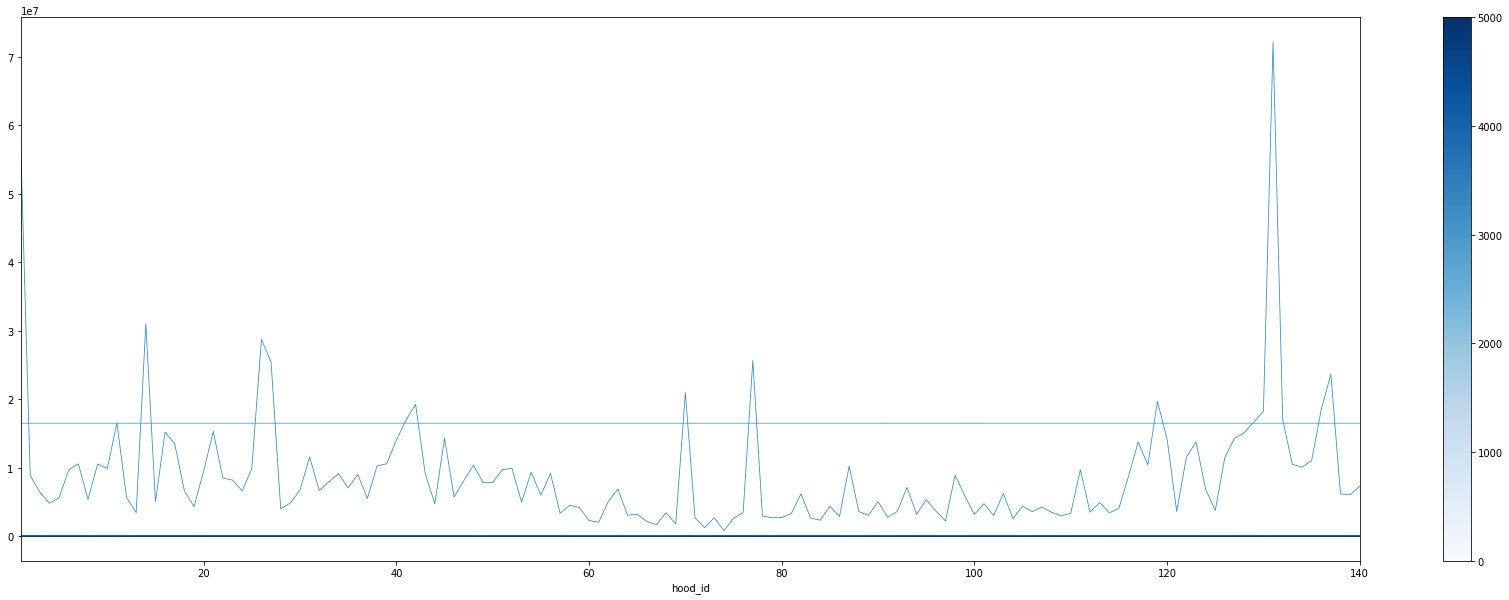

In [465]:
# set the value column that will be visualised
variable = 'Major Crimes / 100k'
# set the range for the choropleth values
vmin, vmax = 0, 5000
# create figure and axes for Matplotlib
fig, ax3 = plt.subplots(1, figsize=(30, 10))
# remove the axis
#ax.axis('off')
# add a title and annotation
ax.set_title('TITLE', fontdict={'fontsize': '25', 'fontweight' : '3'})
# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm.set_array([]) # or alternatively sm._A = []. Not sure why this step is necessary, but many recommends it
# add the colorbar to the figure
fig.colorbar(sm)
# create map
merged.plot('hood_id', cmap='Blues', linewidth=0.8, ax=ax3, markeredgecolor='0.8', legend=False)

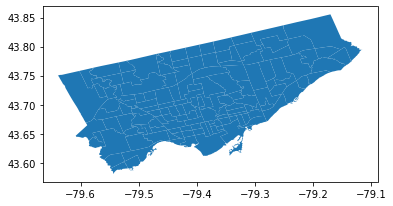

In [448]:
hood_shapefile.plot()